<a href="https://colab.research.google.com/github/danie-cp/Machine-Learning-Models/blob/main/Logistic_Regression_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression Analysis:**
Dataset:

Variables:
- Default (whether the individual defaulted on their credit card payment; Response)
- Student (whether the individual is a student)
- Income (annual income)
- Balance (monthly credit card balance

In [1]:
default <- read.csv("/content/Defaults.csv")

#recode to 1s and 0s

default$studentDummy <- ifelse(default$student == "Yes",1,0)
default$defaultDummy <- ifelse(default$default == "Yes",1,0)

###Fit a logistic regression model to predict default

In [2]:

logit_model1 <- glm(defaultDummy ~ studentDummy + balance + income, data = default, family = "binomial")
summary(logit_model1)


Call:
glm(formula = defaultDummy ~ studentDummy + balance + income, 
    family = "binomial", data = default)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
studentDummy -6.468e-01  2.363e-01  -2.738  0.00619 ** 
balance       5.737e-03  2.319e-04  24.738  < 2e-16 ***
income        3.033e-06  8.203e-06   0.370  0.71152    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


###Fit a logistic regression model without the income variable

In [3]:

logit_model2 <- glm(defaultDummy ~ balance + studentDummy, data = default, family = "binomial")
summary(logit_model2)


Call:
glm(formula = defaultDummy ~ balance + studentDummy, family = "binomial", 
    data = default)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.075e+01  3.692e-01 -29.116  < 2e-16 ***
balance       5.738e-03  2.318e-04  24.750  < 2e-16 ***
studentDummy -7.149e-01  1.475e-01  -4.846 1.26e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.7  on 9997  degrees of freedom
AIC: 1577.7

Number of Fisher Scoring iterations: 8


The equation of the fitted model is given by:
pˆ=exp(−10.75+.005738x1−0.7149x2)/ 1+exp(−10.75+.005738x1−0.7149x2)

###Interpretation of the Coefficients for Logistic Regression

In [4]:

exp(coef(logit_model2))

#percent change in odds
percent_change <- (exp(coef(logit_model2)) -1) *100
round(percent_change,2)

(Intercept)      balance studentDummy 
2.145622e-05 1.005755e+00 4.892520e-01

(Intercept)      balance studentDummy 
     -100.00         0.58       -51.07

Interpretation: if log balance (x) increases by one unit, the odds that the Credit Card will
default increase by a factor of 1.01. And if the individual is a student, the odds that the credit
card will default are .4 more times as likely than a nonstudent.

Visualize result:

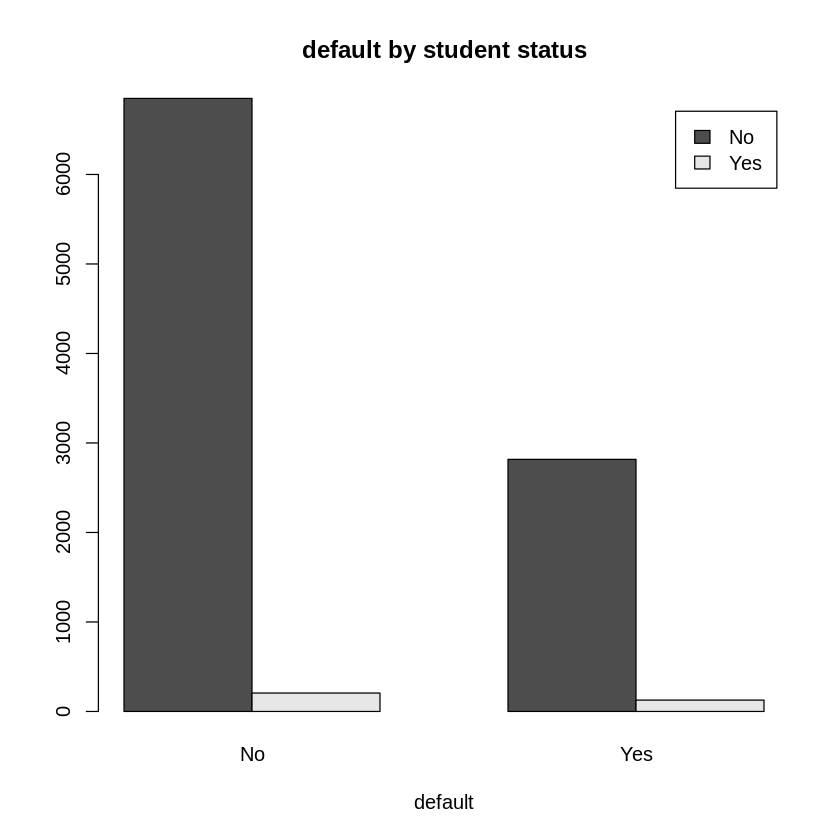

In [5]:
barplot(table(default$default,default$student), beside = T, main = "default by student status", xlab = "default",
        legend.text = rownames(table(default$default,default$student)))


###Make predictions and calculate the model's accuracy

In [6]:
#make predictions
#obtain predicted probabilities of admission for each observation
default$Predicted <- predict(logit_model2, type = "response")
#evaluate model performance
table <- table(Observed = default$default, Predicted = default$Predicted >0.5)
accuracy <- (table[1] + table[4])/sum(table[1:4])
accuracy
table

[1] 0.9733

        Predicted
Observed FALSE TRUE
     No   9628   39
     Yes   228  105

The model has an accuracy of 97.33% in predicting the true positives and true negatives

###ROC Curve

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



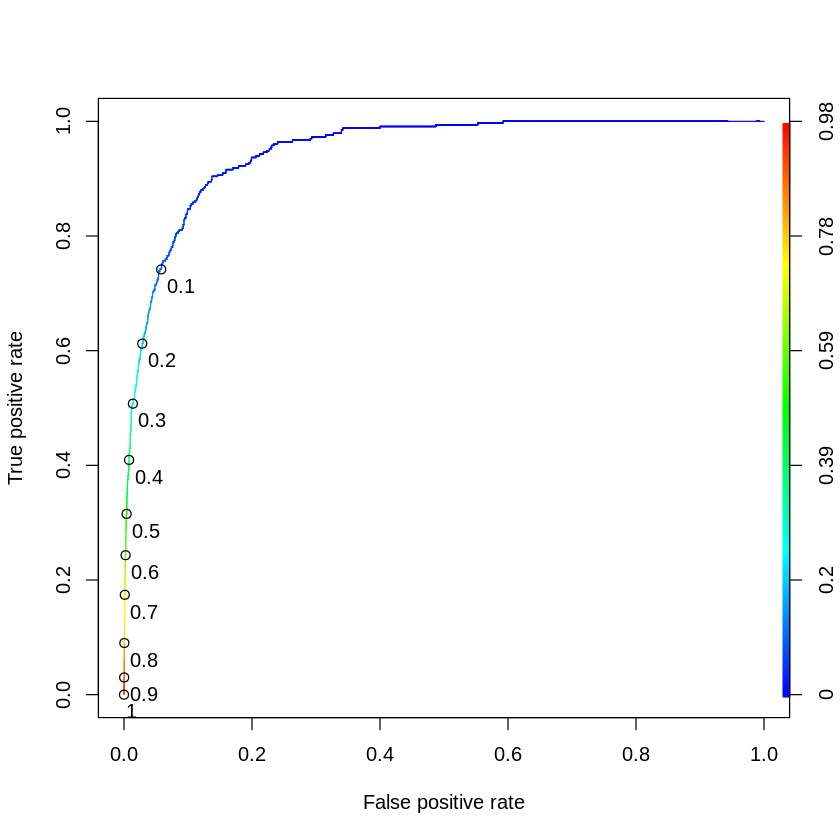

In [12]:
install.packages("ROCR")
library(ROCR)
# Generate prediction and performance objects
ROCRpred <- prediction(default$Predicted, default$default)
ROCRperf <- performance(ROCRpred, 'tpr', 'fpr')
acc_perf <- performance(ROCRpred, "acc")

# Build a table of thresholded metrics
roc_tbl <- data.frame(
  threshold   = unlist(ROCRperf@alpha.values),
  tpr         = unlist(ROCRperf@y.values),
  fpr         = unlist(ROCRperf@x.values),
  accuracy    = unlist(acc_perf@y.values)
)

# Clean-up + derived metrics
roc_tbl <- subset(roc_tbl, !is.na(threshold))     # drop NAs that can appear at extremes
roc_tbl <- roc_tbl[order(-roc_tbl$threshold), ]   # sort from high to low threshold
roc_tbl$specificity <- 1 - roc_tbl$fpr
roc_tbl$youdenJ     <- roc_tbl$tpr - roc_tbl$fpr  # useful for picking a cutoff


#TPR is the true positive rate (sensitivity)
#FTR is the false positive rate

#Plot ROC curve with cutoff points displayed
plot(ROCRperf, colorize = TRUE,
     print.cutoffs.at = seq(0.1, by = 0.1, length = 10),
     text.adj = c(-0.2, 1.7))





The ROC curve shows that the model has a high true positive rate and a low false positive rate,
indicating strong sensitivity.